In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
import simpy
import scipy
from collections import deque
from scipy import stats

loc_lambda = 2
loc_mu = 3
loc_n_servers = 5
loc_ro = loc_lambda/(loc_mu*loc_n_servers)


def customer_arrivals(env, theater):
    """Create new *moviegoers* until the sim time reaches 120."""
    while True:
        yield env.timeout(random.expovariate(1 / 0.5))

        #movie = random.choice(theater.movies)
        num_tickets = random.randint(1, 6)




queue = deque(np.zeros(2))
for i in range(loc_n_servers):
    queue.append(i)
    print(queue.popleft())
    
print(queue)
    
    
"""
λ – the arrival rate into the system as a whole.
μ – the capacity of each of n equal servers.
ρ represents the system load. In a single server system, it will be: ρ=λ/μ
In a multi-server system (one queue with n equal servers, each with capacity μ), it will be
ρ=λ/(nμ)
"""

0.0
0.0
0
1
2
deque([3, 4])


'\nλ – the arrival rate into the system as a whole.\nμ – the capacity of each of n equal servers.\nρ represents the system load. In a single server system, it will be: ρ=λ/μ\nIn a multi-server system (one queue with n equal servers, each with capacity μ), it will be\nρ=λ/(nμ)\n'

In [6]:

import random

import simpy
import numpy as np


#RANDOM_SEED = 42
NEW_CUSTOMERS_base = 10  # Total number of customers
INTERVAL_CUSTOMERS_base =5.0  # Generate new customers roughly every x seconds
MIN_PATIENCE = 50000  # Min. customer patience
MAX_PATIENCE = 51000  # Max. customer patience
Banktime = 5.0
glo_waiting =[]
glo_verbose =False


def source(env, number, interval, counter):
    """Source generates customers randomly"""
    #queuecount= 0
    for i in range(number):
        
        #queuecount+= len(counter.queue)
        c = customer(env, 'Customer%02d' % i, counter, time_in_bank=Banktime)
        env.process(c)
        t = random.expovariate(1.0 / interval)
        yield env.timeout(t)
    #print(queuecount)

def customer(env, name, counter, time_in_bank):
    """Customer arrives, is served and leaves."""
    arrive = env.now
    if glo_verbose ==True:
        print('%7.4f %s: Here I am' % (arrive, name))

    with counter.request() as req:
        patience = random.uniform(MIN_PATIENCE, MAX_PATIENCE)
        # Wait for the counter or abort at the end of our tether
        results = yield req | env.timeout(patience)

        wait = env.now - arrive

        glo_waiting.append(wait)

        if req in results:
            # We got to the counter
            if glo_verbose ==True:
                print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))
            tib = random.expovariate(1.0 / time_in_bank)
            yield env.timeout(tib)
                
            if glo_verbose ==True:
                print('%7.4f %s: Finished' % (env.now, name))

        else:
            # We reneged
            
            #if glo_verbose ==True:
            print('%7.4f %s: RENEGED after %6.3f' % (env.now, name, wait))


In [83]:


# Setup and start the simulation
#random.seed(RANDOM_SEED)
repeats = 100
service_range = 5
dim=2

customer_count_ranges = 3
customer_interval_ranges = 4


avg_waiting_times_col = np.zeros((customer_count_ranges,customer_interval_ranges,repeats,service_range,dim))
for loc_counts in range(customer_count_ranges):
    NEW_CUSTOMERS = np.power(NEW_CUSTOMERS_base,loc_counts+1)
    for loc_intervals in range(customer_interval_ranges):
        loc_interval_customer = INTERVAL_CUSTOMERS_base* (2**(loc_intervals))
        for j in range(repeats):

            avg_waiting_times  = np.zeros((service_range,dim))
            for i in range(1,service_range+1):
                INTERVAL_CUSTOMERS = loc_interval_customer*i

                glo_waiting = []
                env = simpy.Environment()
                # Start processes and run
                counter = simpy.Resource(env, capacity=1)
                env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
                env.run()
                avg_waiting_times[i-1][0] = np.mean(glo_waiting)



                INTERVAL_CUSTOMERS = loc_interval_customer

                glo_waiting = []
                env = simpy.Environment()
                # Start processes and run
                #print(counter.count)
                #print(counter.queue)
                counter = simpy.Resource(env, capacity=i)
                env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
                env.run()
                avg_waiting_times[i-1][1] = np.mean(glo_waiting)
            avg_waiting_times_col[loc_counts][loc_intervals][j] = avg_waiting_times


In [84]:
def welch_t(loc_multdim_array1,loc_multdim_array2,repeats1, repeats2=False, par_axis=0,par_retdf = False,par_sign = 0.05):
    if repeats2 ==False:
        repeats2 = repeats1
    mean_val_at_axis_1 = np.mean(loc_multdim_array1,axis=par_axis).T
    mean_val_at_axis_2 = np.mean(loc_multdim_array2,axis=par_axis).T
    
    
    #Standard deviation of area estimation
    std_val_at_axis_1 = np.std(loc_multdim_array1,axis=par_axis).T
    std_val_at_axis_2 = np.std(loc_multdim_array2,axis=par_axis).T
    
    #Variance of area estimation
    var_val_at_axis_1 = repeats1* np.var(loc_multdim_array1,axis=par_axis).T/(repeats1-1)
    var_val_at_axis_2 = repeats2* np.var(loc_multdim_array2,axis=par_axis).T/(repeats2-1)

    #Welch's T test created from the slides in the lectures
    mean_diff = mean_val_at_axis_1- mean_val_at_axis_2
    var_diff = np.sqrt(var_val_at_axis_1/repeats1 + var_val_at_axis_2/repeats2)
    loc_welch_t =abs(mean_diff/var_diff)
    val_1 = np.power(var_val_at_axis_1/repeats1 + var_val_at_axis_2/repeats2,2)
    val_2 = np.power(var_val_at_axis_1/repeats1,2)/(repeats1-1) + np.power(var_val_at_axis_2/repeats2,2)/(repeats2-1)
    loc_welch_df = np.divide(val_1,val_2)
    if np.shape([loc_welch_df]) == (1,): 
        loc_welch_critical_value = scipy.stats.t.ppf(q=1-par_sign,df=loc_welch_df) 
    else:
        loc_welch_critical_value = np.array([scipy.stats.t.ppf(q=1-.05,df=each_welch_df) for each_welch_df in loc_welch_df])
    if par_retdf == True:
        return loc_welch_t, loc_welch_critical_value, loc_welch_df
    else:
        return loc_welch_t, loc_welch_critical_value
    

In [85]:

sample1 = [14, 15, 15, 15, 16, 18, 22, 23, 24, 25, 25]
sample2 = [10, 12, 14, 15, 18, 22, 24, 27, 31, 33, 34, 34, 34]
#samples = np.append(sample1,sample2,axis=0)
#print(samples)
if(welch_t(sample1,sample2,len(sample1),len(sample2),par_axis=0,par_retdf=True) ==(1.5379022758390934, 1.7333523336880952, 18.13737799877845)):
    print("test for the function 'welch_t' worked")

test for the function 'welch_t' worked


(3, 4, 100, 5)


<Figure size 3000x2000 with 0 Axes>

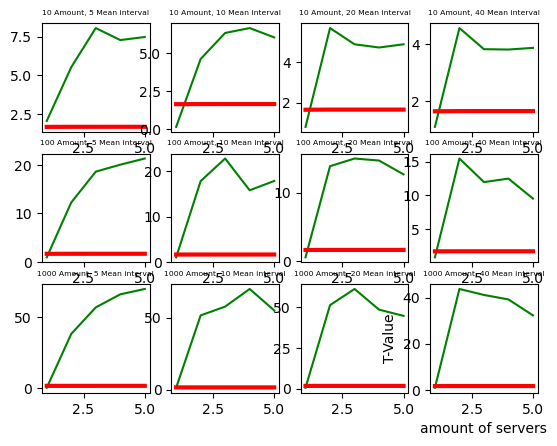

In [86]:
print(np.shape(avg_waiting_times_col.T[1].T))
glo_welch_t,glo_welch_critical_value = welch_t(avg_waiting_times_col.T[0].T,avg_waiting_times_col.T[1].T,np.shape(avg_waiting_times_col.T[1].T)[2],par_axis=2)

x_axis = np.int_(np.arange(int(service_range)) +1)
plt.figure(figsize=(30, 20))
fig, axs = plt.subplots(customer_count_ranges, customer_interval_ranges)


for loc_counts in range(customer_count_ranges):
    for loc_intervals in range(customer_interval_ranges):

        #axs[loc_counts][loc_intervals].plot(np.int_(x_axis),mean_area_estimate_ss.T[loc_counts][loc_intervals],"g-",label ="Welch's T-value")
        #axs[loc_counts][loc_intervals].plot(np.int_(x_axis),mean_area_estimate_mc.T[loc_counts][loc_intervals],"g-",label ="Welch's T-value")
        axs[loc_counts][loc_intervals].plot(np.int_(x_axis),glo_welch_t.T[loc_counts][loc_intervals],"g-",label ="Welch's T-value")
        axs[loc_counts][loc_intervals].plot(np.int_(x_axis),glo_welch_critical_value.T[loc_counts][loc_intervals],"r-",linewidth=3,label ="Corresponding Critical Value")
        title = (str(np.power(NEW_CUSTOMERS_base,loc_counts+1))+" Amount, "+str(int(INTERVAL_CUSTOMERS_base* (2**(loc_intervals))))+" Mean interval")
        axs[loc_counts][loc_intervals].set_title(title,fontsize=5.5)
plt.ylabel("T-Value")
plt.xlabel("amount of servers")
#plt.legend()
#plt.tight_layout()
fig.savefig('welch_t_test_noTitle.png', dpi=300)
plt.show()